In [32]:
import csv
import numpy as np
from matplotlib import pylab as plt
numberOfFeatures = 4
numberOfSpecies = 3

In [33]:
f = open('iris.csv')
A = []
b = []
numberOfSamples = 0
for row in csv.reader(f):
    if not len(row): break
    numberOfSamples += 1
    A.extend(row[0:-1])
    b.extend(row[-1:])

In [45]:
# for sampleIndex in range(numberOfSamples):
#     startingIndex = sampleIndex * numberOfFeatures
#     features = A[startingIndex:startingIndex + 4]
#     species = b[sampleIndex]
#     print features, species

def featureFromA(featureIndex):
    return [A[x] for x in range(len(A)) if (x - featureIndex) % 4 == 0]

a = featureFromA(0)
b = featureFromA(1)
c = featureFromA(2)
d = featureFromA(3)

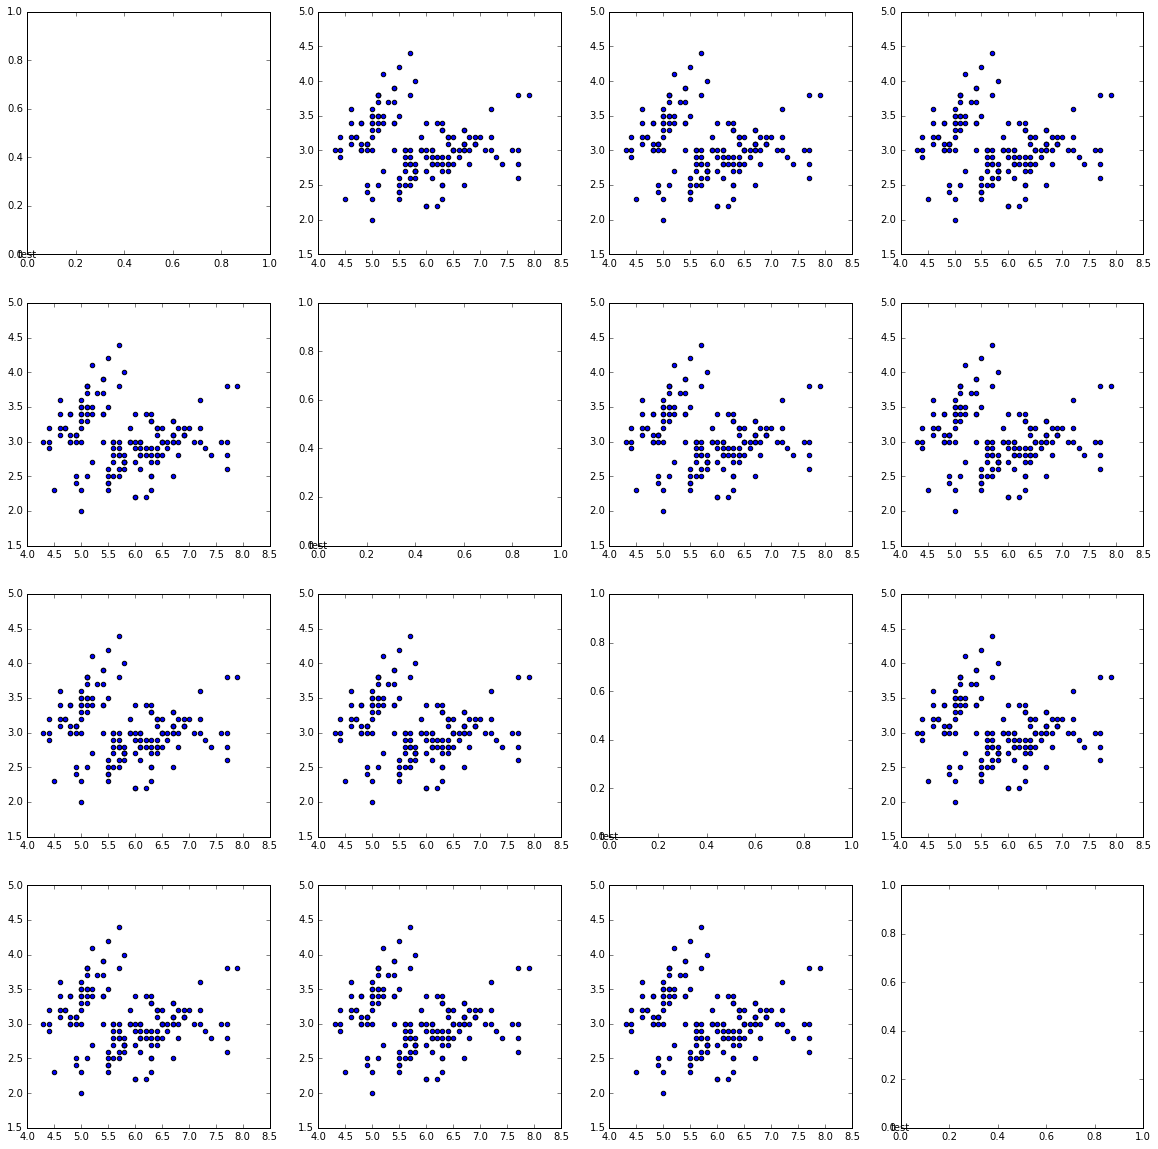

In [79]:
%matplotlib inline

# layout `figure` which contains all the subplots
plt.figure(num=1, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

xs = np.array(a)
ys = np.array(b)
# colors = ["r","r","r","b","b","g","g"]
plt.figure(1)
# plt.subplot(121) #subplot(rows, columns, subplot)
# plt.scatter(xs, ys)
# plt.subplot(122)

numberOfSubplots = numberOfFeatures * numberOfFeatures
for subplot in range(1, numberOfSubplots + 1):
    plt.subplot(numberOfFeatures, numberOfFeatures, subplot)
    if subplot in [x for x in range(numberOfSubplots + 1) if (x - 1) % (numberOfFeatures + 1) == 0 ]:
        plt.text(0, 0, 'test', ha="center", va="center")
    else:
        plt.scatter(xs, ys)